In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
train = pd.read_csv("data/Train.csv", parse_dates=['Date_Customer'])
test = pd.read_csv("data/Test.csv", parse_dates=['Date_Customer'])

train.Disposable_Income.median()

60964.2

In [3]:
train.Disposable_Income.fillna( train.Disposable_Income.median(), inplace=True)
test.Disposable_Income.fillna( test.Disposable_Income.median(), inplace= True)

train['year'] = train.Date_Customer.dt.year
train['month'] = train.Date_Customer.dt.month
train['quater'] = train.Date_Customer.dt.quarter

test['year'] = test.Date_Customer.dt.year
test['month'] = test.Date_Customer.dt.month
test['quater'] = test.Date_Customer.dt.quarter

today = pd.to_datetime('2015-1-1')

train['duration_days'] = (today - train['Date_Customer']).dt.days
train['duration_months'] = ((today- train.Date_Customer)/np.timedelta64(1, 'M'))
train['duration_months'] = train['duration_months'].astype(int)

train['is_month_end'] = train.Date_Customer.dt.is_month_end.astype(int)
train['is_month_start'] = train.Date_Customer.dt.is_month_start.astype(int)

test['duration_days'] = (today - test['Date_Customer']).dt.days
test['duration_months'] = ((today- test.Date_Customer)/np.timedelta64(1, 'M'))
test['duration_months'] = test['duration_months'].astype(int)

test['is_month_end'] = test.Date_Customer.dt.is_month_end.astype(int)
test['is_month_start'] = test.Date_Customer.dt.is_month_start.astype(int)

train = train.drop(190)

education = {
    "Graduation": 1,
    "PhD": 2,
    "Master": 3,
    "2n Cycle": 4,
    "Basic": 5
}

train.Education_Level = train.Education_Level.map(education)
test.Education_Level = test.Education_Level.map(education)

feature = train.columns.drop(['Response', 'ID', 'Date_Customer'])


mar = {
    "Married"  :   1,
"Together":    2,
"Single":      3,
"Divorced":    4,
"Widow":        5,
"Alone":         6,
"YOLO":          7,
"Absurd":        8

}

train.Marital_Status = train.Marital_Status.map(mar)
test.Marital_Status = test.Marital_Status.map(mar)

In [4]:
test.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'year', 'month', 'quater',
       'duration_days', 'duration_months', 'is_month_end', 'is_month_start'],
      dtype='object')

In [5]:
train.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response', 'year', 'month', 'quater',
       'duration_days', 'duration_months', 'is_month_end', 'is_month_start'],
      dtype='object')

In [6]:
train.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response', 'year', 'month', 'quater',
       'duration_days', 'duration_months', 'is_month_end', 'is_month_start'],
      dtype='object')

In [7]:
features = test.columns.drop(['Date_Customer', 'ID'])

In [8]:
test = test[features]

In [9]:
test['Response'] = 'test'
data = pd.concat([train, test]).reset_index(drop = True)

In [10]:
data.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response', 'year', 'month', 'quater',
       'duration_days', 'duration_months', 'is_month_end', 'is_month_start'],
      dtype='object')

In [11]:
data['total_children'] = data['No_of_Kids_in_home'] + data['No_of_Teen_in_home']

In [12]:
poly_feature_1 = ['Discounted_Purchases', 'WebPurchases', 'CatalogPurchases',
       'StorePurchases']
poly_feature_2 = ['Amount_on_Wines', 'Amount_on_Fruits',
       'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds']

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

poly1 = poly.fit_transform(data[poly_feature_1])
poly2 = poly.fit_transform(data[poly_feature_2])

In [15]:
df_poly1 = pd.DataFrame(poly1, columns=[f"poly1_{i}" for i in range(poly1.shape[1])])
df_poly2 = pd.DataFrame(poly2, columns=[f"poly2_{i}" for i in range(poly2.shape[1])])

In [16]:
new_data = pd.concat([data, df_poly1], axis = 1)
new_data = pd.concat([new_data, df_poly2], axis = 1)

In [17]:
# new_data = data.copy()

In [18]:
new_data['total_purchase'] = new_data[poly_feature_1].sum(axis = 1)
new_data['total_amount_on'] = new_data[poly_feature_2].sum(axis = 1)

In [19]:
# new_data['year_month'] = 
new_data['year_month'] = new_data['year'].apply(str) + "_"  + new_data['month'].apply(str)

In [20]:
# (new_data['year'].apply(str) + "_"  + new_data['month'].apply(str)).value_counts()

In [21]:
# bin_label = [1,2,3,4,5]
new_data['Recency_bin'] = pd.qcut(new_data.Recency, q = [0, .2, .4, .6, .8, 1], labels=False)

In [22]:
new_data['Recency' + '_mean_on_yr_mth'] = new_data['Recency'].groupby(new_data['year_month']).transform('mean')
new_data['Recency' + '_std_on_yr_mth'] = new_data['Recency'].groupby(new_data['year_month']).transform('std')
new_data['Recency' + '_max_on_yr_mth'] = new_data['Recency'].groupby(new_data['year_month']).transform('max')
new_data['Recency' + '_min_on_yr_mth'] = new_data['Recency'].groupby(new_data['year_month']).transform('min')

# new_data.head(12)

In [23]:
new_data['year_month_int'], _ = pd.factorize(new_data['year_month'])

In [24]:
# df_poly1.colu

In [25]:
# new_data['year_month_int']

In [26]:
new_data.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response', 'year', 'month', 'quater',
       'duration_days', 'duration_months', 'is_month_end', 'is_month_start',
       'total_children', 'poly1_0', 'poly1_1', 'poly1_2', 'poly1_3', 'poly1_4',
       'poly1_5', 'poly1_6', 'poly1_7', 'poly1_8', 'poly1_9', 'poly2_0',
       'poly2_1', 'poly2_2', 'poly2_3', 'poly2_4', 'poly2_5', 'poly2_6',
       'poly2_7', 'poly2_8', 'poly2_9', 'poly2_10', 'poly2_11', 'poly2_12',
       'poly2_13', 'poly2_14', 'poly2_15

In [37]:
features = new_data.select_dtypes(include = 'number').columns

In [50]:
features

Index(['Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases',
       'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits',
       'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'year', 'month', 'quater',
       'duration_days', 'duration_months', 'is_month_end', 'is_month_start',
       'total_children', 'poly1_0', 'poly1_1', 'poly1_2', 'poly1_3', 'poly1_4',
       'poly1_5', 'poly1_6', 'poly1_7', 'poly1_8', 'poly1_9', 'poly2_0',
       'poly2_1', 'poly2_2', 'poly2_3', 'poly2_4', 'poly2_5', 'poly2_6',
       'poly2_7', 'poly2_8', 'poly2_9', 'poly2_10', 'poly2_11', 'poly2_12',
       'poly2_13', 'poly2_14', 'poly2_15', 'poly2_16', 'poly2_17', 'poly2_1

In [39]:
# new_data.isna().sum()

In [40]:
train_df = new_data.loc[(new_data['Response'] != 'test')].reset_index(drop = True)
test_df = new_data.loc[(new_data['Response'] == 'test')].reset_index(drop = True)

In [41]:
train_df['Response'] = train_df['Response'].apply(int)

In [42]:
target = 'Response'

In [43]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, f1_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [44]:
X = train_df[features]
y = train_df[target]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
model = XGBClassifier(scale_pos_weight = 8,max_depth = 8, n_estimators = 500, eval_metric = 'logloss')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

print(f1_score(prediction, y_test))

0.5617977528089888


In [47]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [48]:
model = LGBMClassifier(scale_pos_weight = 1,max_depth=6, n_estimators = 1000, learning_rate=0.01)
model.fit(X_train_res, y_train_res)
prediction = model.predict(X_test)

print(f1_score(prediction, y_test))

0.5263157894736842


In [49]:
def eval_metric(y, pred):
#     return log_loss(y, pred, labels=[0, 1])
    return f1_score(y, pred)

k = 10
kf = StratifiedKFold(k)

# params = {
#     'n_estimators': 1000,
#     'learning_rate': 0.1,
#     'objective': 'CrossEntropy',
#     'rsm': 0.7,
#     'random_seed': 0,
#     'early_stopping_rounds': 300,
#     'use_best_model': True,
# #     'metrics': 'F1',
# }

# params = {
#     'learning_rate': 0.024,
#     'depth': 4,
#     'l2_leaf_reg': 3.0,
#     'min_child_samples': 1,
#     'colsample_bylevel': 0.010217852176927477,
#     'scale_pos_weight': 5,
#     'bootstrap_type': 'Bayesian',
#     'use_best_model': True,

# }

# params = {'learning_rate': 0.17189002889743385,
#  'reg_lambda': 88.96105444304975,
#  'reg_alpha': 3.246030226067426e-05,
#  'subsample': 0.4245917826890226,
#  'colsample_bytree': 0.6017070515886215,
#  'max_depth': 5,
#  'scale_pos_weight': 8}

In [160]:
features.shape

(71,)

In [195]:
len(new_feat)

30

In [53]:
#   Value: 0.6504678443688615
#   Params: 
#     learning_rate: 0.024
#     depth: 4
#     l2_leaf_reg: 3.0
#     min_child_samples: 1
#     colsample_bylevel: 0.010217852176927477
#     scale_pos_weight: 5
#     bootstrap_type: Bayesian

In [ ]:
train_df = X

In [103]:
import xgboost
print(xgboost.__version__)

1.3.3


In [54]:
# new_feat = feature_importance_df.sort_values(by = ['importance'], ascending = False).head(30)['feature'].to_list()
# new_feat = features

In [81]:
from imblearn.over_sampling import SMOTE
sm =SMOTE(sampling_strategy={1:300, 0:1400},random_state=50)
#     sm = SMOTE(random_state=42)
X_, y_ = sm.fit_resample(train_df[features], train_df[target])

In [96]:
errcb2=[]
y_pred_totcb2=[]

params = {'learning_rate': 0.3,
#  'subsample': 0.7845527188607021,
#  'colsample_bytree': 0.6474680443294045,
 'max_depth': 8,
 'scale_pos_weight': 1}
fold=StratifiedKFold(n_splits=5)#15#5#10
i=1
for train_index, test_index in fold.split(X_,y_):
        
    X_train, X_test = X_.iloc[train_index], X_.iloc[test_index]
    y_train, y_test = y_.iloc[train_index], y_.iloc[test_index]
#     sm = SMOTE(k_neighbors=7)
#     X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
#     m2  = XGBClassifier(   n_estimators=500, random_seed= 42, use_best_model=True, scale_pos_weight = 5, max_depth = 4)
    m2 = LGBMClassifier(**params, eval_metric = 'logloss', n_estimators=1000)
#     m2 = XGBClassifier(n_estimators=500, scale_pos_weight = 4)
#         m2 = XGBClassifier(**param)
    
#     m2 = LGBMClassifier(silent=True, n_estimators=1500, learning_rate = 0.01, scale_pos_weight = 8, max_depth = 9, subsample=0.5)
    m2.fit(X_train_oversampled,y_train_oversampled,eval_set=[(X_train_oversampled,y_train_oversampled),(X_test, y_test)], early_stopping_rounds=300, verbose = False)#erly100
    preds=m2.predict(X_test)
    print("err: ",(f1_score(y_test,preds)))
    errcb2.append(f1_score(y_test,preds))
    p2 = m2.predict_proba(test_df[features])[:, -1]
    y_pred_totcb2.append(p2)
    

print(np.mean(errcb2))

err:  0.983050847457627
err:  0.9917355371900827
err:  0.9833333333333333
err:  0.9672131147540983
err:  0.7843137254901961
0.9419293116450674


In [97]:
pred = np.mean(y_pred_totcb2, axis = 0)

In [98]:
pred = np.where(pred > 0.5, 1, 0)

In [100]:
sub = pd.read_csv('data/SampleSubmission.csv')

In [101]:
sub.Response = pred

In [102]:
sub.to_csv('smote3.csv', index = False)

In [ ]:
Avg log :  0.6410329899405849

Text(0.5, 1.0, 'CatboostClassifier features importance (top 50):')

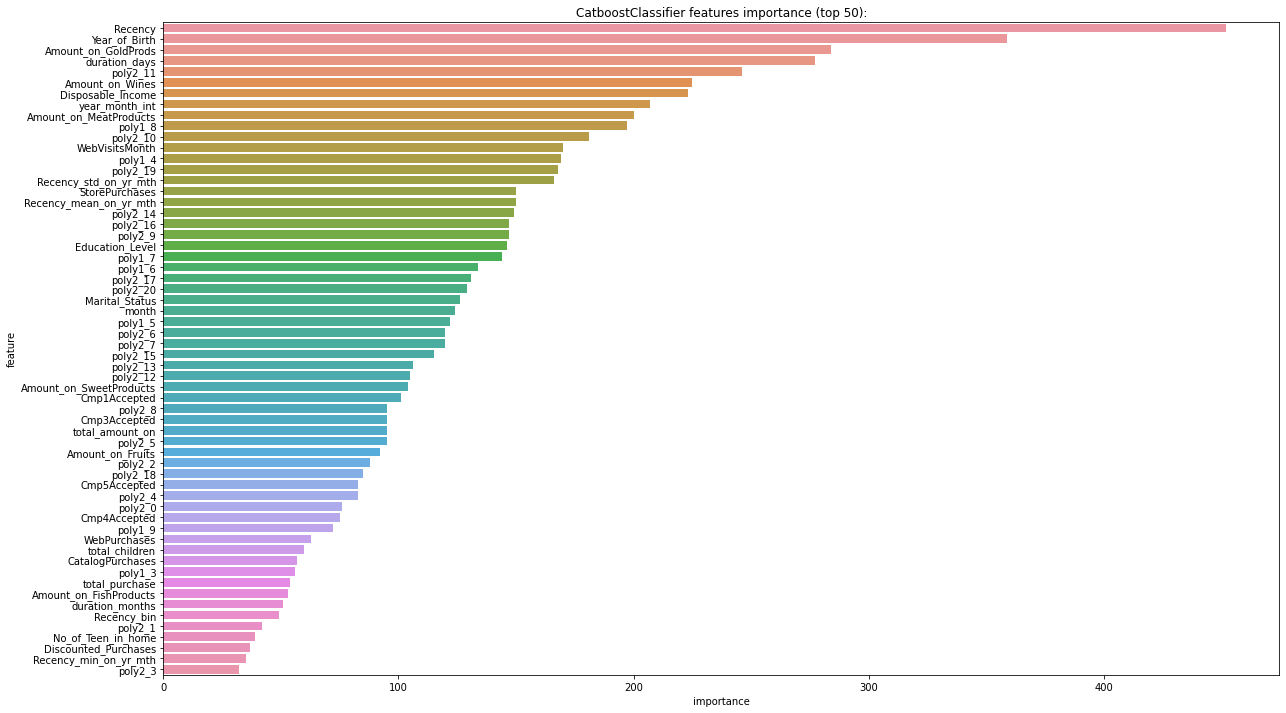

In [199]:
# 0.7831404345536787
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = new_data[features].columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(60))
plt.title('CatboostClassifier features importance (top 50):')

In [148]:
new_feat = feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50)['feature'].to_list()

In [70]:
# # 0.7831404345536787
# feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
# feature_importance_df['feature'] = new_data[features].columns

# plt.figure(figsize=(20, 12));
# sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(70))
# plt.title('CatboostClassifier features importance (top 50):')

In [71]:
# # 0.7831404345536787
# feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
# feature_importance_df['feature'] = new_data[features].columns

# plt.figure(figsize=(20, 12));
# sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(70))
# plt.title('CatboostClassifier features importance (top 50):')

In [77]:
import optuna

In [43]:
X = train_df[features]
y = train_df[target]

In [184]:
X = train_df[new_feat2]

In [44]:
def objective(trial):
    errcb2=[]
    y_pred_totcb2=[]


    param = {}
    param['objective'] = "Logloss"
    param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.1, 0.001)
    param['depth'] = trial.suggest_int('depth', 3, 15)
    param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)
    param['min_child_samples'] = trial.suggest_categorical('min_child_samples', [1, 4, 8, 16, 32])
    param['iterations'] = trial.suggest_discrete_uniform("iterations", 200, 2000, 50)
    param['use_best_model'] = True
    param["colsample_bylevel"] =  trial.suggest_float("colsample_bylevel", 0.01, 0.1)
    param['random_state'] = 0
    param['scale_pos_weight'] = trial.suggest_int('scale_pos_weight', 1, 10)
    param['bootstrap_type'] = trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"])
    param['logging_level'] = 'Silent'




    fold=StratifiedKFold(n_splits=5)#15#5#10
    i=1
    for train_index, test_index in fold.split(X,y):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     m2  = XGBClassifier(   n_estimators=500, random_seed= 42, use_best_model=True, scale_pos_weight = 5, max_depth = 4)
        m2 = CatBoostClassifier(**param)
#         m2 = XGBClassifier(**param)
    
#     m2 = LGBMClassifier(silent=True, n_estimators=1500, learning_rate = 0.01, scale_pos_weight = 8, max_depth = 9, subsample=0.5)
        m2.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=500, verbose = False)#erly100
        preds=m2.predict(X_test)
#         print("err: ",np.sqrt(f1_score(y_test,preds)))
        errcb2.append(f1_score(y_test,preds))
#     p2 = m2.predict(test[feature])
#     y_pred_totcb2.append(p2)
    

    return np.mean(errcb2)

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10000)

In [75]:
# print("Number of finished trials: {}".format(len(study.trials)))

# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))

# print("  Params: ")
# for key, value in trial.params.items():
#     print("    {}: {}".format(key, value))

In [183]:
new_feat2 = ['Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases',
       'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits',
       'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'year', 'month', 'quater',
       'duration_days', 'duration_months', 'is_month_end', 'is_month_start']

In [187]:
def objective(trial):
    errcb2=[]
    y_pred_totcb2=[]


    param = {}
#     param['objective'] = "Logloss"
#     param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.1, 0.001)
#     param['depth'] = trial.suggest_int('depth', 3, 15)
#     param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)
#     param['min_child_samples'] = trial.suggest_categorical('min_child_samples', [1, 4, 8, 16, 32])
#     param['iterations'] = trial.suggest_discrete_uniform("iterations", 200, 2000, 50)
#     param['use_best_model'] = True
#     param["colsample_bylevel"] =  trial.suggest_float("colsample_bylevel", 0.01, 0.1)
#     param['random_state'] = 0
    
#     param['bootstrap_type'] = trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"])
#     param['logging_level'] = 'Silent'
    
    param["learning_rate"] = trial.suggest_float("learning_rate", 1e-2, 0.25, log=True)
#     param['reg_lambda'] = trial.suggest_loguniform("reg_lambda", 1e-8, 100.0)
#     param['reg_alpha'] = trial.suggest_loguniform("reg_alpha", 1e-8, 100.0)
    param['subsample'] = trial.suggest_float("subsample", 0.1, 1.0)
    param['colsample_bytree'] = trial.suggest_float("colsample_bytree", 0.1, 1.0)
    param['max_depth'] = trial.suggest_int("max_depth", 5, 20)
    param['scale_pos_weight'] = trial.suggest_int('scale_pos_weight', 3, 10)
#     param['eval_metric'] = 'logloss'




    fold=StratifiedKFold(n_splits=5)#15#5#10
    i=1
    for train_index, test_index in fold.split(X,y):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     m2  = XGBClassifier(   n_estimators=500, random_seed= 42, use_best_model=True, scale_pos_weight = 5, max_depth = 4)
        m2 = LGBMClassifier(**param ,n_estimators=10000)
#         m2 = XGBClassifier(**param)
    
#     m2 = LGBMClassifier(silent=True, n_estimators=1500, learning_rate = 0.01, scale_pos_weight = 8, max_depth = 9, subsample=0.5)
        m2.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=300, verbose = False)#erly100
        preds=m2.predict(X_test)
#         print("err: ",np.sqrt(f1_score(y_test,preds)))
        errcb2.append(f1_score(y_test,preds))
#     p2 = m2.predict(test[feature])
#     y_pred_totcb2.append(p2)
    

    return np.mean(errcb2)

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10000)

In [137]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 50
Best trial:
  Value: 0.6409386972699005
  Params: 
    learning_rate: 0.17189002889743385
    reg_lambda: 88.96105444304975
    reg_alpha: 3.246030226067426e-05
    subsample: 0.4245917826890226
    colsample_bytree: 0.6017070515886215
    max_depth: 5
    scale_pos_weight: 8


In [138]:
trial.params

{'learning_rate': 0.17189002889743385,
 'reg_lambda': 88.96105444304975,
 'reg_alpha': 3.246030226067426e-05,
 'subsample': 0.4245917826890226,
 'colsample_bytree': 0.6017070515886215,
 'max_depth': 5,
 'scale_pos_weight': 8}

In [ ]:
errcb2=[]
y_pred_totcb2=[]

# param = {'learning_rate': 0.04727378849339339,
#  'reg_lambda': 0.00016849354710582758,
#  'reg_alpha': 8.87809309843409e-05,
#  'subsample': 0.7571962972282198,
#  'colsample_bytree': 0.9447906803804901,
#  'max_depth': 2,
#  'scale_pos_weight': 8}
param = {'learning_rate': 0.017607944236537856,
 'reg_lambda': 4.820815992854445e-05,
 'reg_alpha': 4.477109243679438e-05,
 'subsample': 0.9514920089965258,
 'colsample_bytree': 0.560450228453528,
 'max_depth': 2,
 'scale_pos_weight': 6}



fold=StratifiedKFold(n_splits=5)#15#5#10
i=1

for train_index, test_index in fold.split(X,y):
        
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     m2  = XGBClassifier(   n_estimators=500, random_seed= 42, use_best_model=True, scale_pos_weight = 5, max_depth = 4)
    m2 = LGBMClassifier(**param ,n_estimators=10000)
#         m2 = XGBClassifier(**param)
    
#     m2 = LGBMClassifier(silent=True, n_estimators=1500, learning_rate = 0.01, scale_pos_weight = 8, max_depth = 9, subsample=0.5)
    m2.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=500, verbose = False)#erly100
    preds=m2.predict(X_test)
    print("err: ",f1_score(y_test,preds))
    errcb2.append(f1_score(y_test,preds))
    p2 = m2.predict(test_df[features])
    y_pred_totcb2.append(p2)
    
print(np.mean(errcb2))

In [ ]:
trial.params

In [ ]:
Trial 3100 finished with value: 0.9395282013444826 and parameters: {'learning_rate': 0.042, 'depth': 3,
                                                                  'l2_leaf_reg': 1.5, 'min_child_samples': 8, 
                                                                  'iterations': 1400.0, 'colsample_bylevel': 0.03307446978765261,
                                                                  'scale_pos_weight': 4, 'bootstrap_type': 'MVS'}. Best is trial 31 with value: 0.9795282013444826.

In [200]:
pred = np.max(test_oofs, axis=0)

In [94]:
sub = pd.read_csv('data/SampleSubmission.csv')

In [117]:
sub.Response = pd.DataFrame(y_pred_totcb2).T.mode(1)
# sub.Response = round(sub.Response)

In [201]:
sub['Response'] = pred

In [202]:
sub.to_csv('submit_fe_cat10.csv', index = False)